# Linear Regression with Scikit Learn - Machine Learning with Python 

This is a part of [Zero to Data Science Bootcamp by Jovian](https://zerotodatascience.com) and [Machine Learning with Python: Zero to GBMs](https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms)

![](https://i.imgur.com/1EzyZvj.png)


The following topics are covered in this tutorial:

- A typical problem statement for machine learning
- Downloading and exploring a dataset for machine learning
- Linear regression with one variable using Scikit-learn
- Linear regression with multiple variables 
- Using categorical features for machine learning
- Regression coefficients and feature importance
- Other models and techniques for regression using Scikit-learn
- Applying linear regression to other datasets

## Problem Statement

This tutorial takes a practical and coding-focused approach. We'll define the terms _machine learning_ and _linear regression_ in the context of a problem, and later generalize their definitions. We'll work through a typical machine learning problem step-by-step:


> **QUESTION**: ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. As the lead data scientist at ACME, **you're tasked with creating an automated system to estimate the annual medical expenditure for new customers**, using information such as their age, sex, BMI, children, smoking habits and region of residence. 
>
> Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction.
> 
> You're given a [CSV file](https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv) containing verified historical data, consisting of the aforementioned information and the actual medical charges incurred by over 1300 customers. 
> <img src="https://i.imgur.com/87Uw0aG.png" width="480">
>
> Dataset source: https://github.com/stedy/Machine-Learning-with-R-datasets

## Downloading the Data

To begin, let's import the data using pandas

In [1]:
import pandas as pd

medical_df = pd.read_csv('/kaggle/input/insurance/insurance.csv')

medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


The dataset contains 1338 rows and 7 columns. Each row of the dataset contains information about one customer. 

Our objective is to find a way to estimate the value in the "charges" column using the values in the other columns. If we can do so for the historical data, then we should able to estimate charges for new customers too, simply by asking for information like their age, sex, BMI, no. of children, smoking habits and region.

## Overlooking the data.

**Let's check the data type for each column.**

In [2]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Looks like "age", "children", "bmi" ([body mass index](https://en.wikipedia.org/wiki/Body_mass_index)) and "charges" are numbers, whereas "sex", "smoker" and "region" are strings (possibly categories). None of the columns contain any missing values, which saves us a fair bit of work!

**Here are some statistics for the numerical columns:**

In [3]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The ranges of values in the numerical columns seem reasonable too (no negative ages!), so we may not have to do much data cleaning or correction. The "charges" column seems to be significantly skewed however, as the median (50 percentile) is much lower than the maximum value.

## Exploratory Analysis and Visualization

Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "charges" and other columns.

We'll use libraries Matplotlib, Seaborn and Plotly for visualization. Follow these tutorials to learn how to use these libraries: 

- https://jovian.ai/aakashns/python-matplotlib-data-visualization
- https://jovian.ai/aakashns/interactive-visualization-plotly
- https://jovian.ai/aakashns/dataviz-cheatsheet

In [4]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

The following settings will improve the default style and font sizes for our charts. This Also helps to save the Plotly plots for offline use.

In [109]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (16, 9)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Age

Age is a numeric column. The minimum age in the dataset is 18 and the maximum age is 64. Thus, we can visualize the distribution of age using a histogram with 47 bins (one for each year) and a box plot. We'll use plotly to make the chart interactive, but you can create similar charts using Seaborn.

> When "**marginal='box'**" is used, a box plot is added on either the x-axis or y-axis of the histogram, depending on the orientation of the histogram. The box plot displays the summary statistics of the data distribution, such as the median, quartiles, and outliers, providing additional insights into the distribution of the data.

> This can be useful for gaining a deeper understanding of the shape, spread, and central tendency of the data in the histogram, and for identifying potential outliers or skewness in the distribution. It can also help in comparing the distribution of data across different categories or groups, if applicable.

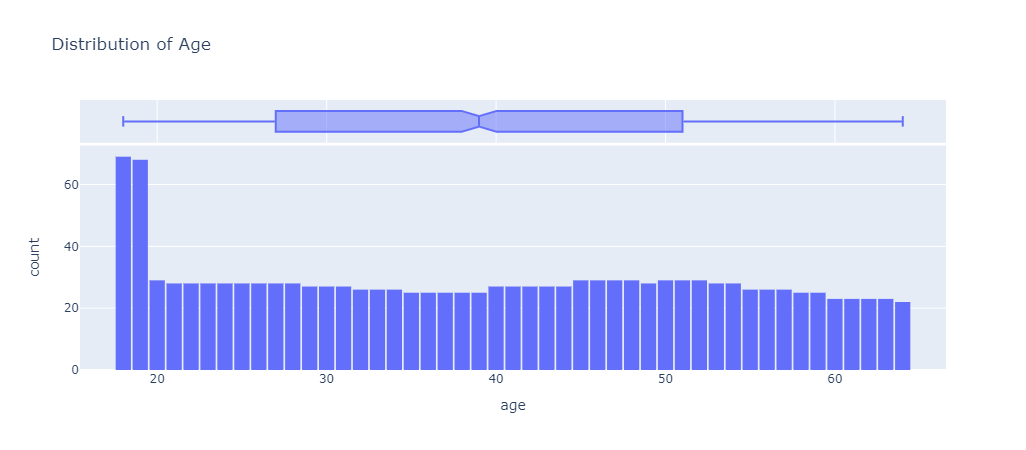

In [6]:
fig = px.histogram(medical_df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age, except for the ages 18 and 19, which seem to have over twice as many customers as other ages. ***This might due to the fact that there might be some discounts for early bird joiners or people might be aware that insurances is a must. But these are just my assumptions. Also we have enough data or information to confirm it is true or not.*** The uniform distribution might arise from the fact that there isn't a big variation in the [number of people of any given age](https://www.statista.com/statistics/241488/population-of-the-us-by-sex-and-age/) (between 18 & 64) in the USA.


### Body Mass Index

Let's look at the distribution of BMI (Body Mass Index) of customers, using a histogram and box plot.

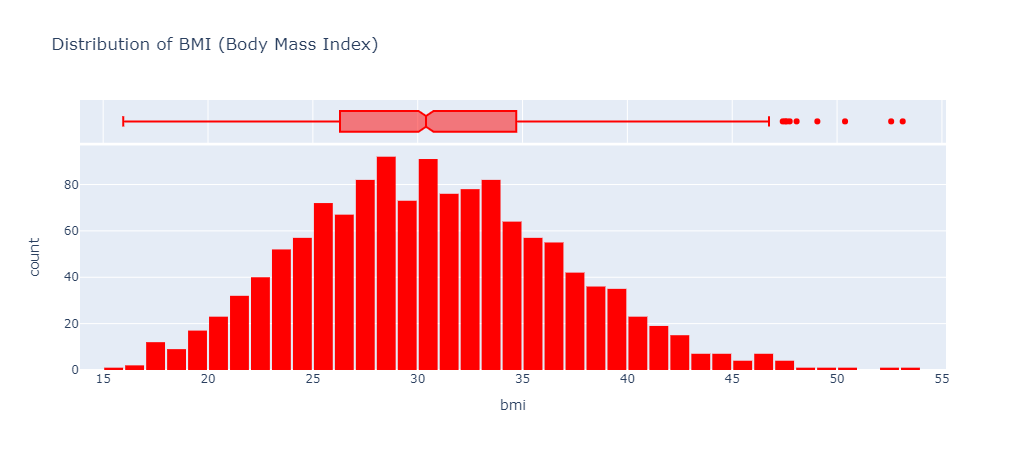

In [7]:
fig = px.histogram(medical_df, 
                   x='bmi', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

The measurements of body mass index seem to form a [Gaussian distribution](https://en.wikipedia.org/wiki/Normal_distribution) centered around the value 30, with a few outliers towards the right. Here's how BMI values can be interpreted ([source](https://study.com/academy/lesson/what-is-bmi-definition-formula-calculation.html)):

![](https://i.imgur.com/lh23OiY.jpg)

*The distribution of ages in a sample of the U.S population may form a uniform distribution because the age distribution is relatively the same across all age groups. This means that there are roughly equal numbers of individuals in each age group, resulting in a uniform distribution.*

*On the other hand, the distribution of BMIs (Body Mass Index) may form a Gaussian or normal distribution because BMI tends to follow a bell-shaped curve in a large population. A Gaussian distribution implies that most people in the dataset tend to have BMIs around a particular value, which is the peak of the distribution, with fewer individuals having higher or lower BMIs on the left and right tails of the curve.*

### Charges

Let's visualize the distribution of "charges" i.e. the annual medical charges for customers. This is the column we're trying to predict. Let's also use the categorical column "smoker" to distinguish the charges for smokers and non-smokers.

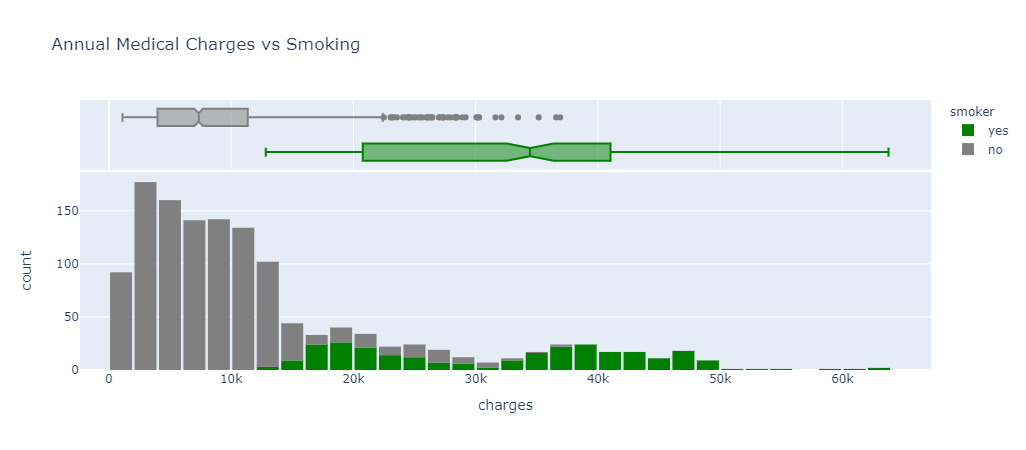

In [8]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges vs Smoking')
fig.update_layout(bargap=0.1)
fig.show()

We can make the following observations from the above graph:

* For most customers, the annual medical charges are under \\$10,000. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases. The distribution follows a "power law"
* There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is \\$7300, the median for smokers is close to \\$35,000.

Visualizing the distribution of medical charges in connection with other factors like "sex" and "region".

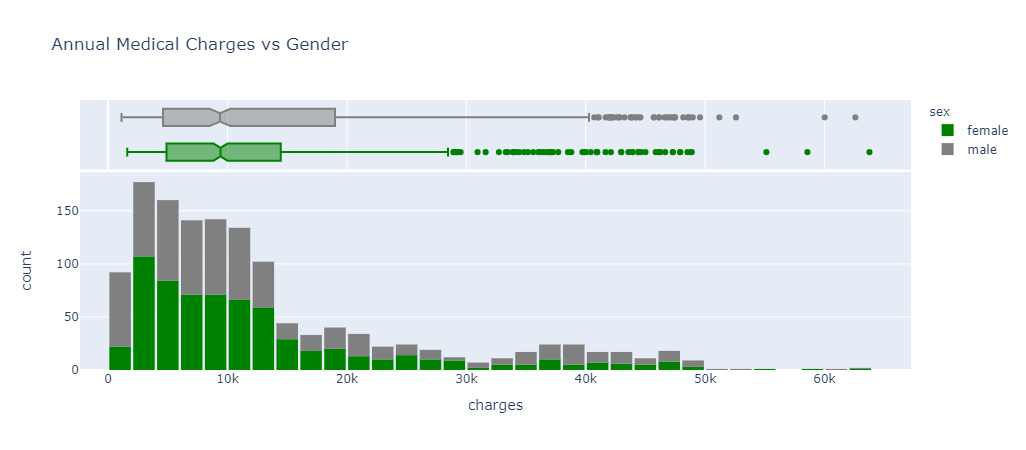

In [9]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='sex', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges vs Gender')
fig.update_layout(bargap=0.1)
fig.show()

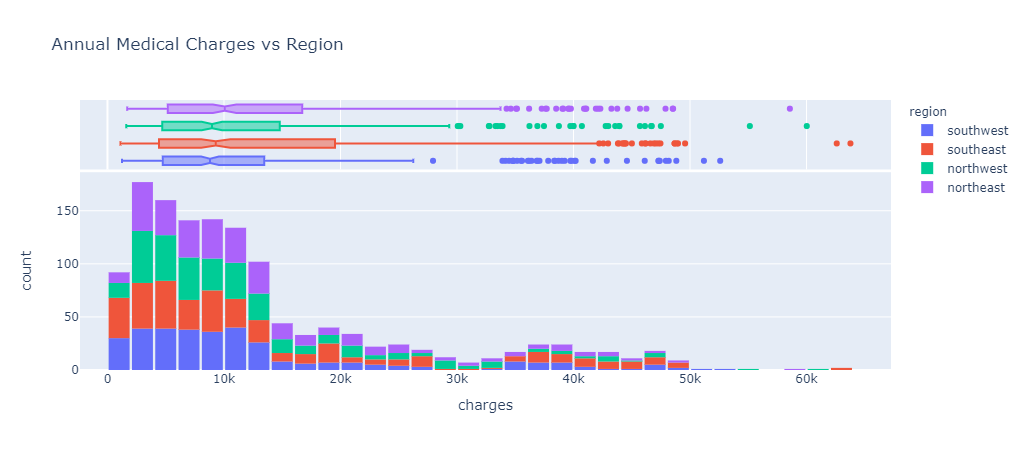

In [10]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='region',  
                   title='Annual Medical Charges vs Region')
fig.update_layout(bargap=0.1)
fig.show()

### Smoker

Let's visualize the distribution of the "smoker" column (containing values "yes" and "no") using a histogram.

In [11]:
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

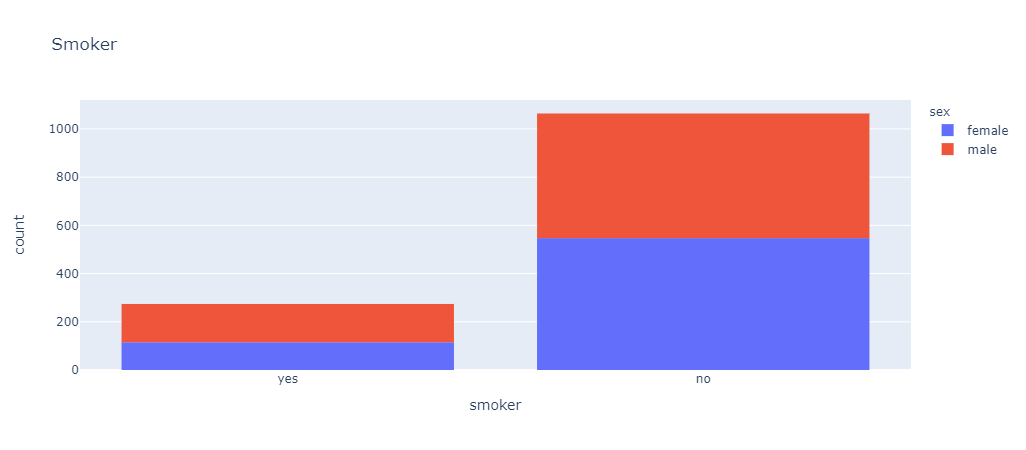

In [12]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker')

It appears that 20% of customers have reported that they smoke. The national average seems to around 14% for male and 11% for female. we have a pretty similar values here like 11% for male and 8.5% for female. so our data seems good to overall U.S average

Lets visualize the distributions of the "sex", "region" and "children" columns and report our observations. 

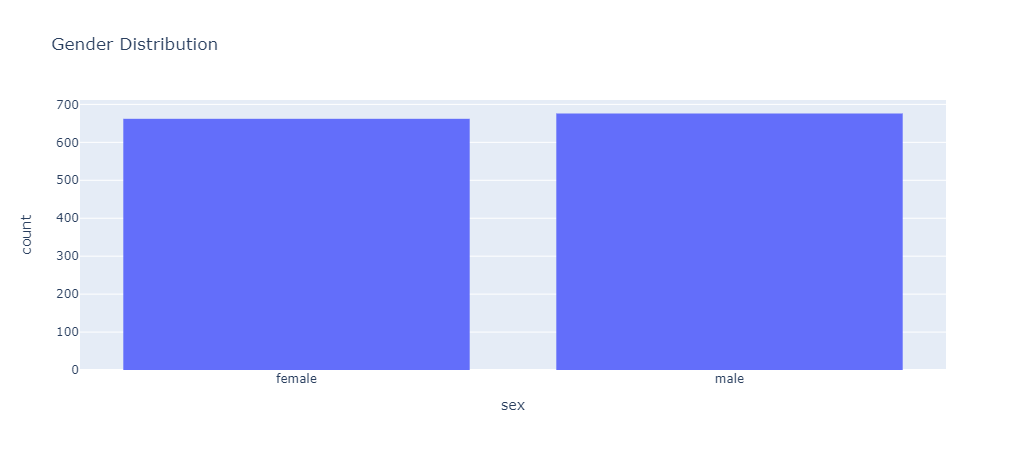

In [13]:
px.histogram(medical_df, x='sex', title='Gender Distribution')

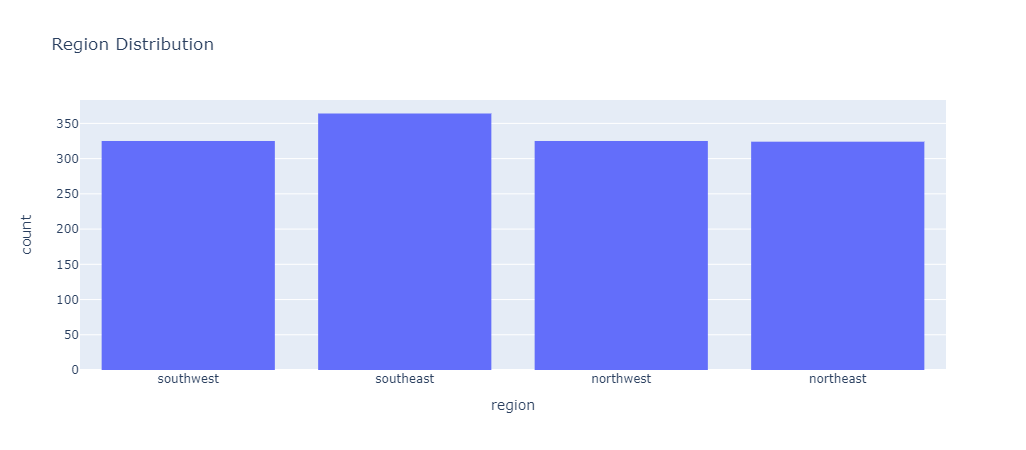

In [14]:
px.histogram(medical_df, x='region', title='Region Distribution')

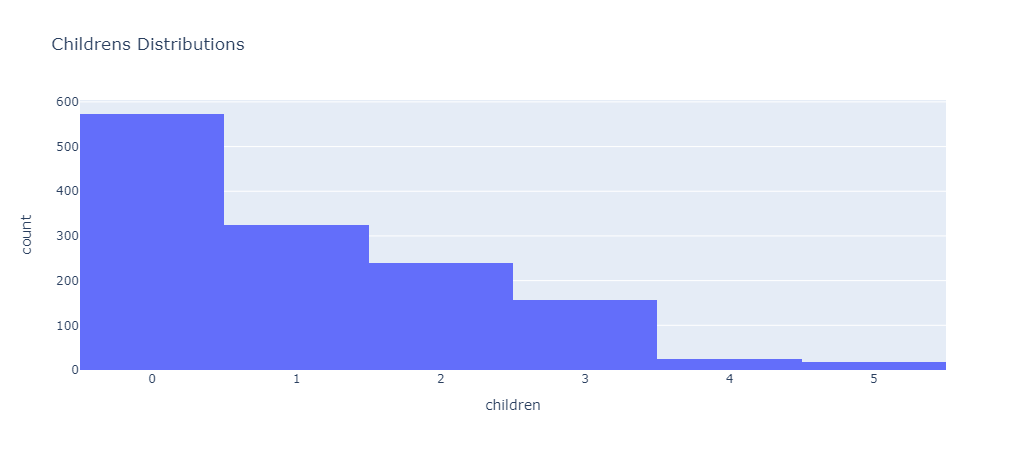

In [15]:
px.histogram(medical_df, x='children', title='Childrens Distributions')

The "Region and Gender" columns have equally distributed in our dataset while the "Children" column have a "power law" distribution. which is basically having a huge amount of count on a paricular value in a column while having very less counts on other values.

Having looked at individual columns, we can now visualize the relationship between "charges" (the value we wish to predict) and other columns.

### Age and Charges

Let's visualize the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points.

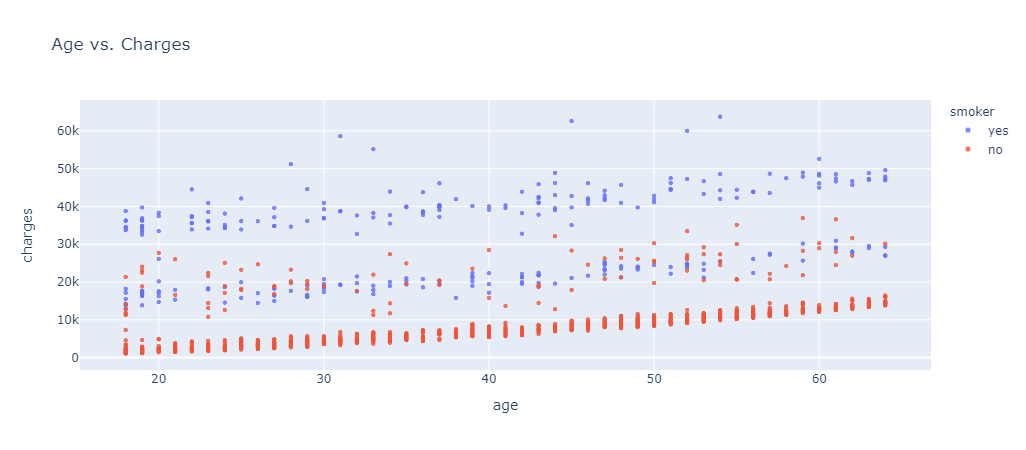

In [16]:
fig = px.scatter(medical_df, 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

We can make the following observations from the above chart:

* The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.


* We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

     1. The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others
     
     2. The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".
     
     3. The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.
     4. Among the 3 clusters I can see that the uppermost cluster have a average BMI hovering around in the thirties while the middle and lower cluster has BMI averaging in the twenties.

### BMI and Charges

Let's visualize the relationship between BMI (body mass index) and charges using another scatter plot. Once again, we'll use the values from the "smoker" column to color the points.

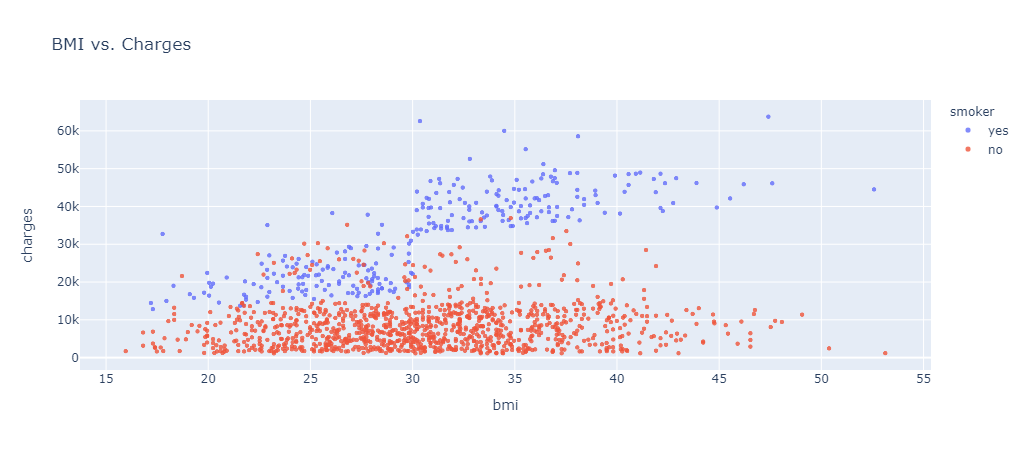

In [17]:
fig = px.scatter(medical_df, 
                 x='bmi', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.

Creating some more graphs to visualize how the "charges" column is related to other columns ("children", "sex", "region" and "smoker")

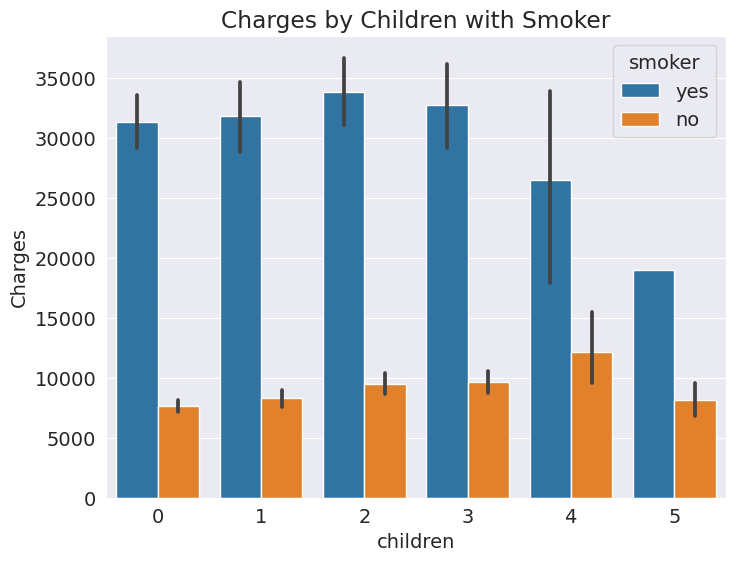

In [18]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="children", y="charges", hue="smoker", data=medical_df, ax=ax)
ax.set_ylabel("Charges")
ax.set_title("Charges by Children with Smoker")
plt.show()

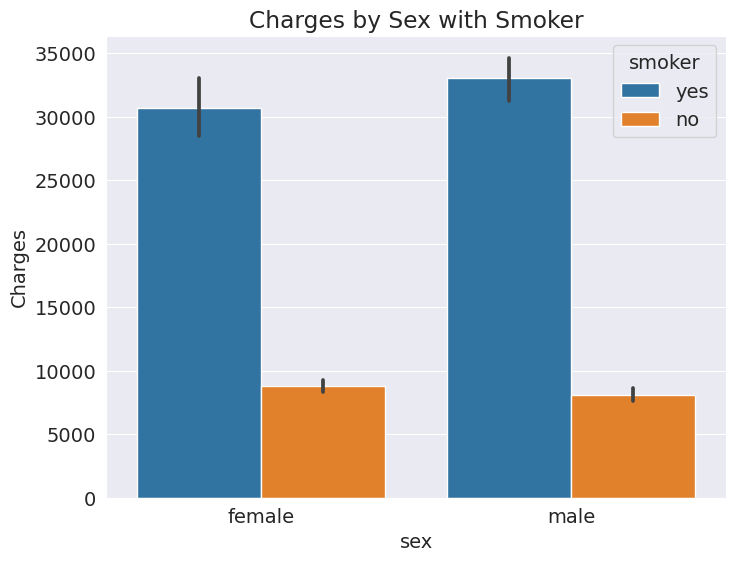

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="sex", y="charges", hue="smoker", data=medical_df, ax=ax)
ax.set_ylabel("Charges")
ax.set_title("Charges by Sex with Smoker")
plt.show()

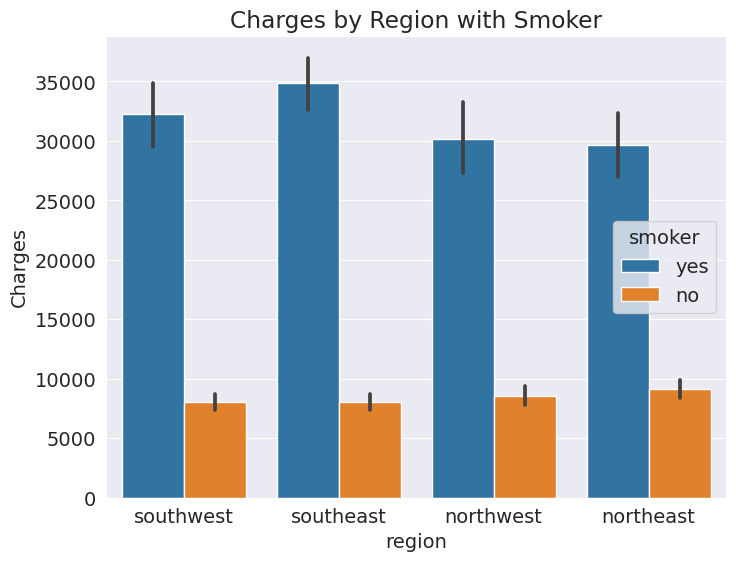

In [20]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x="region", y="charges", hue="smoker", data=medical_df, ax=ax)
ax.set_ylabel("Charges")
ax.set_title("Charges by Region with Smoker")
plt.show()

### Correlation

As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

This relationship is often expressed numerically using a measure called the _correlation coefficient_, which can be computed using the `.corr` method of a Pandas series.

In [21]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [22]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

To compute the correlation for categorical columns, they must first be converted into numeric columns.

In [23]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.787251430498478




Here's how correlation coefficients can be interpreted ([source](https://statisticsbyjim.com/basics/correlations)):

* **Strength**: The greater the absolute value of the correlation coefficient, the stronger the relationship.

    * The extreme values of -1 and 1 indicate a perfectly linear relationship where a change in one variable is accompanied by a perfectly consistent change in the other. For these relationships, all of the data points fall on a line. In practice, you won’t see either type of perfect relationship.

    * A coefficient of zero represents no linear relationship. As one variable increases, there is no tendency in the other variable to either increase or decrease.
    
    * When the value is in-between 0 and +1/-1, there is a relationship, but the points don’t all fall on a line. As r approaches -1 or 1, the strength of the relationship increases and the data points tend to fall closer to a line.


* **Direction**: The sign of the correlation coefficient represents the direction of the relationship.

    * Positive coefficients indicate that when the value of one variable increases, the value of the other variable also tends to increase. Positive relationships produce an upward slope on a scatterplot.
    
    * Negative coefficients represent cases when the value of one variable increases, the value of the other variable tends to decrease. Negative relationships produce a downward slope.

Here's the same relationship expressed visually ([source](https://www.cuemath.com/data/how-to-calculate-correlation-coefficient/)):

<img src="https://i.imgur.com/3XUpDlw.png" width="360">

The correlation coefficient has the following formula:

<img src="https://i.imgur.com/unapugP.png" width="360">

You can learn more about the mathematical definition and geometric interpretation of correlation here: https://www.youtube.com/watch?v=xZ_z8KWkhXE

Pandas dataframes also provide a `.corr` method to compute the correlation coefficients between all pairs of numeric columns.

In [24]:
medical_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


The result of `.corr` is called a correlation matrix and is often visualized using a heatmap.

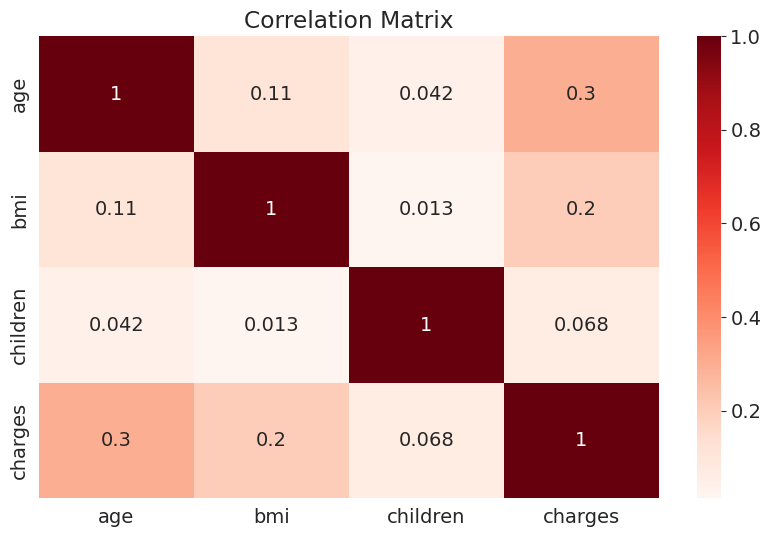

In [25]:
sns.heatmap(medical_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

**Correlation vs causation fallacy:** Note that a high correlation cannot be used to interpret a cause-effect relationship between features. Two features $X$ and $Y$ can be correlated if $X$ causes $Y$ or if $Y$ causes $X$, or if both are caused independently by some other factor $Z$, and the correlation will no longer hold true if one of the cause-effect relationships is broken. It's also possible that $X$ are $Y$ simply appear to be correlated because the sample is too small. 

While this may seem obvious, computers can't differentiate between correlation and causation, and decisions based on automated system can often have major consequences on society, so it's important to study why automated systems lead to a given result. Determining cause-effect relationships requires human insight.

## Linear Regression using a Single Feature

We now know that the "smoker" and "age" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers.

***NOTE: Some of the code below are just to slice the Linear Regression Model to understand the intution behind it. Just follow the explanation and not the code. A Linear model will be build at the end of the notebook. I'll hide the code just to avoid confusion***

Next, let's visualize the relationship between "age" and "charges"

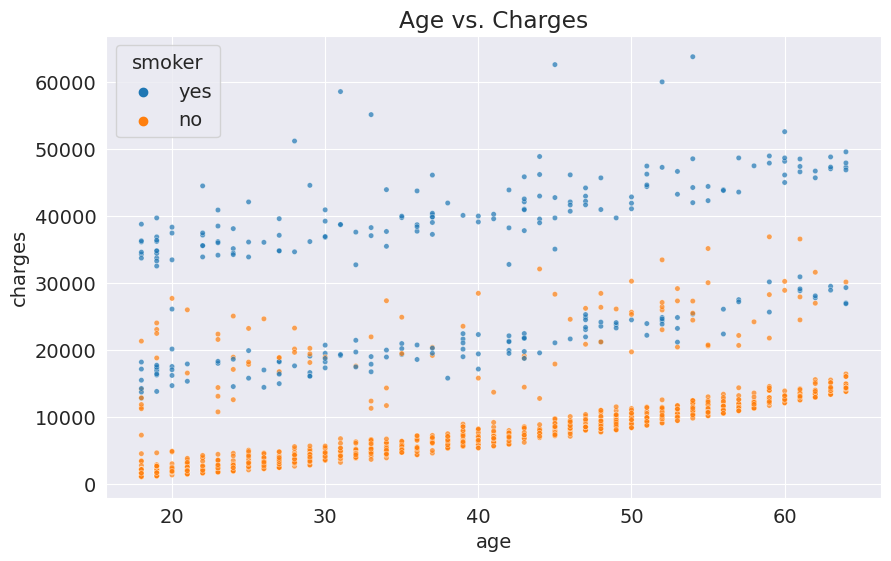

In [26]:
plt.title('Age vs. Charges')
sns.scatterplot(data=medical_df, x='age', y='charges',hue='smoker', alpha=0.7, s=15);

We'll try and "fit" a line using this points, and use the line to predict charges for a given age. A line on the X&Y coordinates has the following formula:

$y = wx + b$

The line is characterized two numbers: $w$ (called "slope") and $b$ (called "intercept"). 

### Model

In the above case, the x axis shows "age" and the y axis shows "charges". Thus, we're assuming the following relationship between the two:

$charges = w \times age + b$

We'll try determine $w$ and $b$ for the line that best fits the data. 

* This technique is called _linear regression_, and we call the above equation a _linear regression model_, because it models the relationship between "age" and "charges" as a straight line. 

* The numbers $w$ and $b$ are called the _parameters_ or _weights_ of the model.

* The values in the "age" column of the dataset are called the _inputs_ to the model and the values in the charges column are called "targets". 

Let define a helper function `estimate_charges`, to compute $charges$, given $age$, $w$ and $b$.


In [27]:
def estimate_charges(age, w, b):
    return w * age + b

The `estimate_charges` function is our very first _model_.

Let's _test_ the values for a given $age$,$w$ and $b$ and use them to estimate the value for charges.

In [28]:
age=32
w = 50
b = 100
print("The predicted charge for the given values is:",estimate_charges(age, w, b))

The predicted charge for the given values is: 1700


This is a very basic single point $y$ we predicted manually using some pre assumed values. lets try to do for an list of _ages_ and see what happends

In [29]:
# we create a pandas series by taking first 10 age values from our dataset
ages=medical_df.age.head(10)
ages

0    19
1    18
2    28
3    33
4    32
5    31
6    46
7    37
8    37
9    60
Name: age, dtype: int64

In [30]:
# Our fuction can take the pandas series of values and create estimated charges for each age.
# The resultant is also a pandas dataframe.
estimated_charges = estimate_charges(ages, w, b)
estimated_charges

0    1050
1    1000
2    1500
3    1750
4    1700
5    1650
6    2400
7    1950
8    1950
9    3100
Name: age, dtype: int64

We can plot the estimated charges using a line graph.

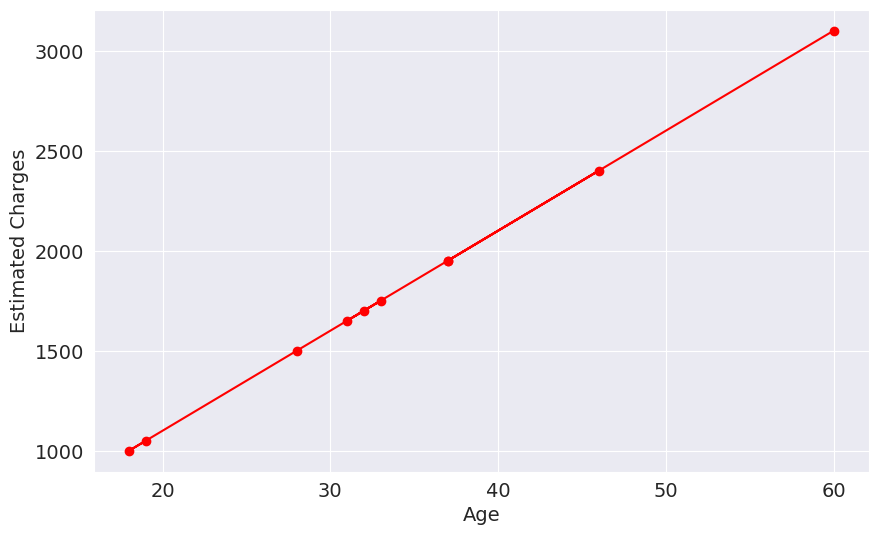

In [31]:
plt.plot(ages, estimated_charges, 'r-o');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

As expected, the points lie on a straight line. This happened because of the fact that we used manual values for the $w$ and $b$

Now we input all the ages in our data and we can overlay this line on the actual data, so see how well our _model_ fits the _data_.

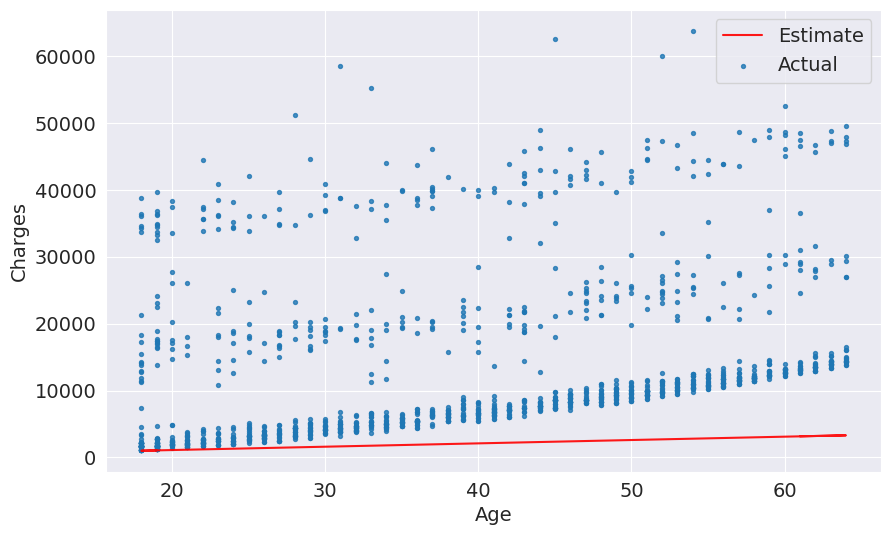

In [32]:
# Repeating the same steps as above but for all the age values
ages=medical_df.age
target = medical_df.charges

estimated_charges = estimate_charges(ages, w, b)

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

Clearly, the our estimates are quite poor and the line does not "fit" the data. However, we can try different values of $w$ and $b$ to move the line around. Let's define a helper function `try_parameters` which takes `w` and `b` as inputs and creates the above plot.

In [33]:
def try_parameters(w, b):
    ages = medical_df.age
    target = medical_df.charges
    
    def estimate_charges(age, w, b):
        return w * age + b
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

This function is similar to the previous one _estimate_charges_ but in that the $w$ and $b$ is fixed. Here we are using an option to change the $w$ and $b$ values as inputs and the program create '_y_=$w$x + $b$' then plots it against our 'medical_df' data. Now we'll try to experiment with different $w$ and $b$ values.

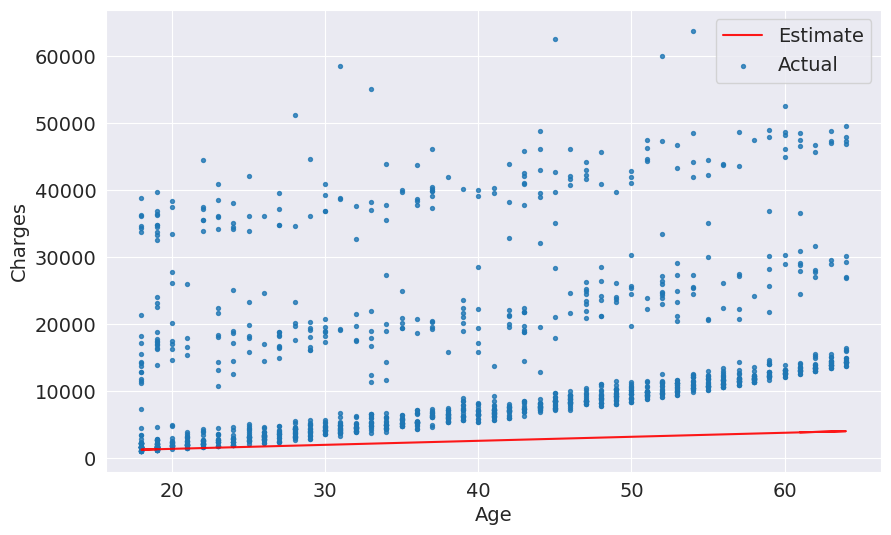

In [34]:
try_parameters(60, 200)

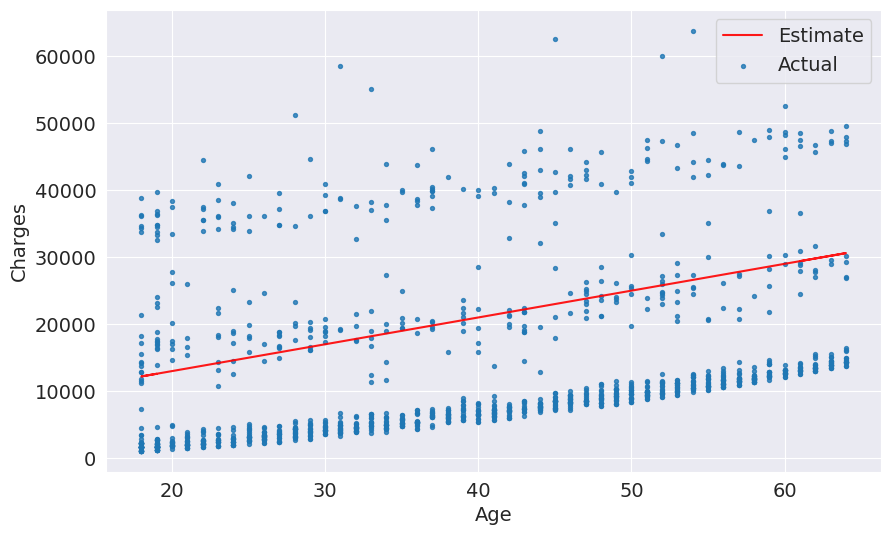

In [35]:
try_parameters(400, 5000)

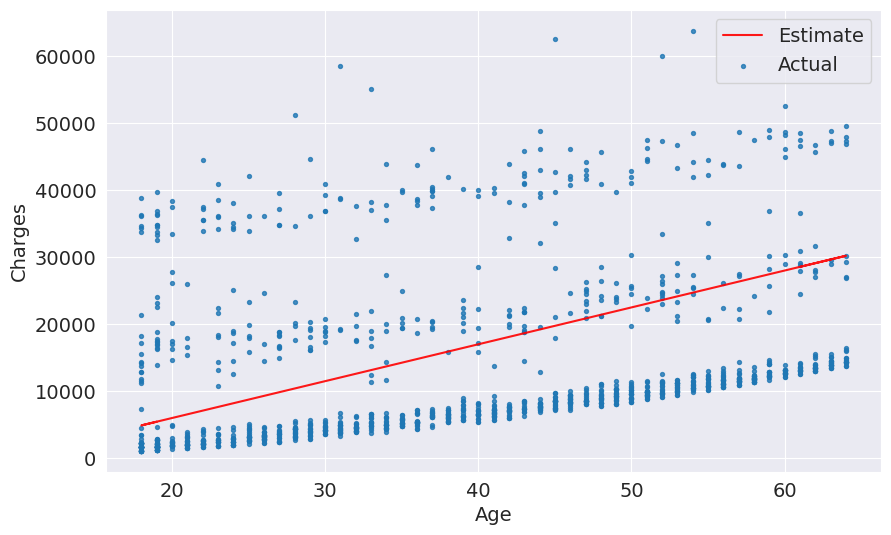

In [36]:
try_parameters(550, -5000)

As we change the values, of $w$ and $b$ manually, trying to move the line visually closer to the points, we are _learning_ the approximate relationship between "age" and "charges". 

Wouldn't it be nice if a computer could try several different values of `w` and `b` and _learn_ the relationship between "age" and "charges"? To do this, we need to solve a couple of problems:

1. We need a way to measure numerically how well the line fits the points.

2. Once the "measure of fit" has been computed, we need a way to modify `w` and `b` to improve the the fit.

If we can solve the above problems, it should be possible for a computer to determine `w` and `b` for the best fit line, starting from a random guess.

### Calculating Loss

We can compare our model's predictions with the actual targets using the following method:

* Calculate the difference between the targets and predictions (the differenced is called the "residual")
* Square all elements of the difference matrix to remove negative values.
* Calculate the average of the elements in the resulting matrix.
* Take the square root of the result

The result is a single number, known as the **root mean squared error** (RMSE). The above description can be stated mathematically as follows: 

<img src="https://i.imgur.com/WCanPkA.png" width="360">

Geometrically, the residuals can be visualized as follows:

<img src="https://i.imgur.com/ll3NL80.png" width="420">

Let's define a function to compute the RMSE.

In [37]:
import numpy as np

def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

Let's compute the RMSE for our model with a sample set of weights

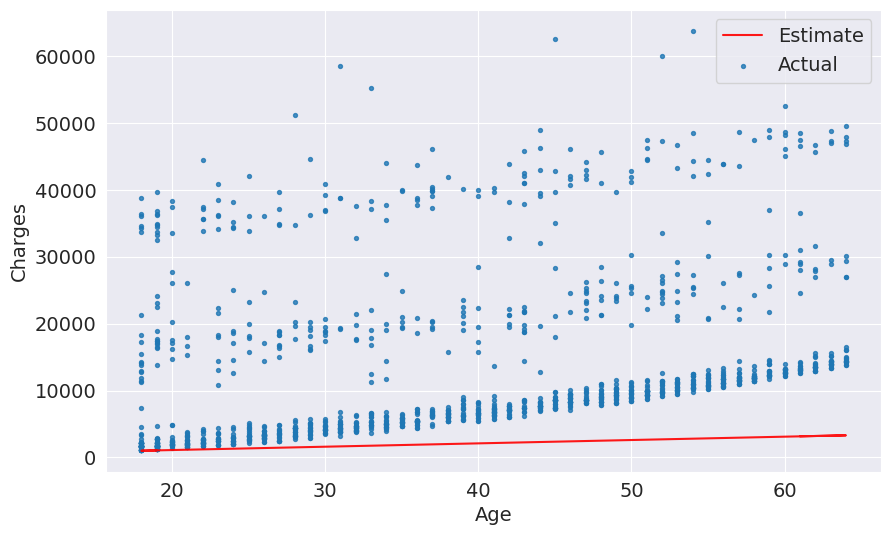

In [38]:
try_parameters(50, 100)

In [39]:
targets = medical_df['charges']
predicted = estimate_charges(medical_df.age, w, b)

In [40]:
rmse(targets, predicted)

16359.031600298249

Here's how we can interpret the above number: *On average, each element in the prediction differs from the actual target by \\$16359*. 

The result is called the *loss* because it indicates how bad the model is at predicting the target variables. It represents information loss in the model: the lower the loss, the better the model.

### Optimizer

Next, we need a strategy to modify weights `w` and `b` to reduce the loss and improve the "fit" of the line to the data.

* Ordinary Least Squares: https://www.youtube.com/watch?v=szXbuO3bVRk (better for smaller datasets)
* Stochastic gradient descent: https://www.youtube.com/watch?v=sDv4f4s2SB8 (better for larger datasets)

Both of these have the same objective: to minimize the loss, however, while ordinary least squares directly computes the best values for `w` and `b` using matrix operations, while gradient descent uses a iterative approach, starting with a random values of `w` and `b` and slowly improving them using derivatives. 

Here's a visualization of how gradient descent works:

![](https://miro.medium.com/max/1728/1*NO-YvpHHadk5lLxtg4Gfrw.gif)

Doesn't it look similar to our own strategy of gradually moving the line closer to the points?



### Linear Regression using Scikit-learn

**In practice, you'll never need to implement either of the above methods yourself**. You can use a library like `scikit-learn` to do this for you. 

Let's use the `LinearRegression` class from `scikit-learn` to find the best fit line for "age" vs. "charges" using the ordinary least squares optimization technique.

In [41]:
from sklearn.linear_model import LinearRegression

First, we create a new model object.

In [42]:
model = LinearRegression()

Next, we can use the `fit` method of the model to find the best fit line for the inputs and targets.

In [43]:
help(model.fit) #to Understand how the function Linear Regression works.

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



Not that the input `X` must be a 2-d array, so we'll need to pass a dataframe, instead of a single column.

In [44]:
inputs = medical_df[['age']]
targets = medical_df.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (1338, 1)
targes.shape : (1338,)


Let's fit the model to the data.

In [45]:
model.fit(inputs, targets)

LinearRegression()

We can now make predictions using the model. Let's try predicting the charges for the ages 23, 37 and 61

In [46]:
model.predict(np.array([[23], 
                        [37], 
                        [61]]))

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 9093.5052354 , 12701.62189674, 18886.96474474])

Do these values seem reasonable? Compare them with the scatter plot above.

Let compute the predictions for the entire set of inputs

In [47]:
predictions = model.predict(inputs)

In [48]:
predictions

array([ 8062.61476073,  7804.89214207, 10382.11832874, ...,
        7804.89214207,  8578.05999807, 18886.96474474])

Let's compute the RMSE loss to evaluate the model.

In [49]:
rmse(targets, predictions)

11551.66562075632

Seems like our prediction is off by $11551 on average, which is not too bad considering the fact that there are several outliers.

The parameters of the model are stored in the `coef_` and `intercept_` properties.

In [50]:
# w
model.coef_

array([257.72261867])

In [51]:
# b
model.intercept_

3165.885006063021

Are these parameters close to your best guesses?

Let's visualize the line created by the above parameters.

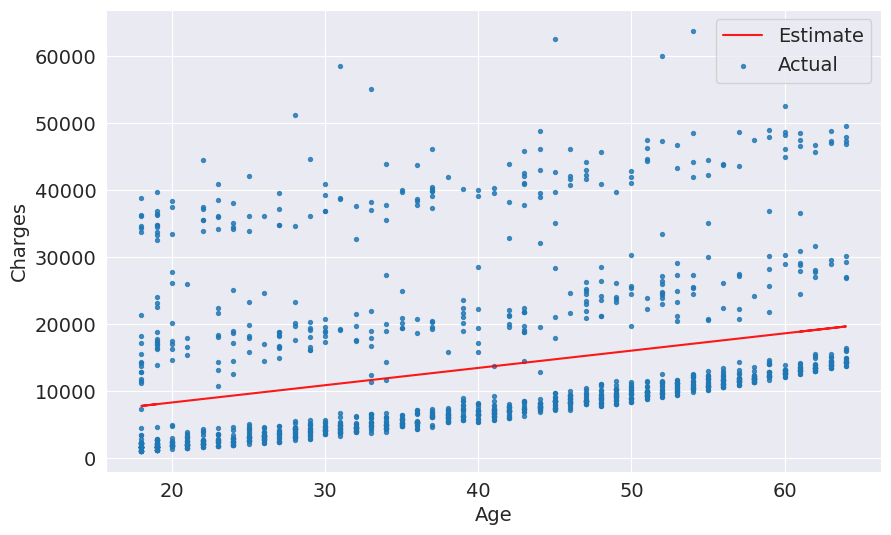

In [52]:
try_parameters(model.coef_, model.intercept_)

Indeed the line is quite close to the points. It is slightly above the cluster of points, because it's also trying to account for the outliers. 

we can use the [`SGDRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) class from `scikit-learn` to train a model using the stochastic gradient descent technique. Make predictions and compute the loss.

### Machine Learning

Congratulations, you've just trained your first _machine learning model!_ Machine learning is simply the process of computing the best parameters to model the relationship between some feature and targets. 

Every machine learning problem has three components:

1. **Model**

2. **Cost Function**

3. **Optimizer**

We'll look at several examples of each of the above in future tutorials. Here's how the relationship between these three components can be visualized:

<img src="https://i.imgur.com/oiGQFJ9.png" width="480">

As we've seen above, it takes just a few lines of code to train a machine learning model using `scikit-learn`.

Below is the complied version of how the linear regression is impliemented using `scikitlearn` in python

In [53]:
# Create inputs and targets
inputs, targets = medical_df[['age']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11551.66562075632


## Linear Regression using Multiple Features

So far, we've used on the "age" feature to estimate "charges". Adding another feature like "bmi" is fairly straightforward. We simply assume the following relationship:

$charges = w_1 \times age + w_2 \times bmi + b$

We need to change just one line of code to include the BMI.

In [54]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11374.110466839007


As you can see, adding the BMI doesn't seem to reduce the loss by much, as the BMI has a very weak correlation with charges, especially for non smokers.

In [55]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

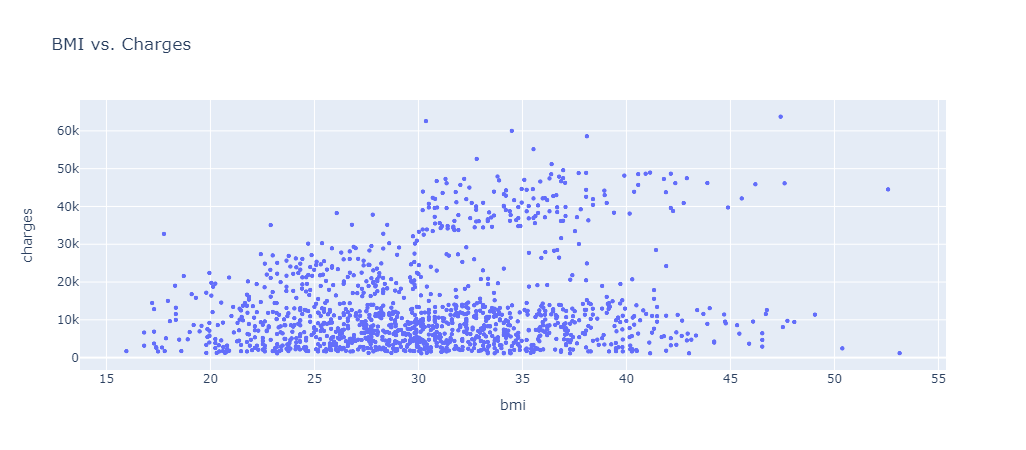

In [56]:
fig = px.scatter(medical_df, x='bmi', y='charges', title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

We can also visualize the relationship between all 3 variables "age", "bmi" and "charges" using a 3D scatter plot.

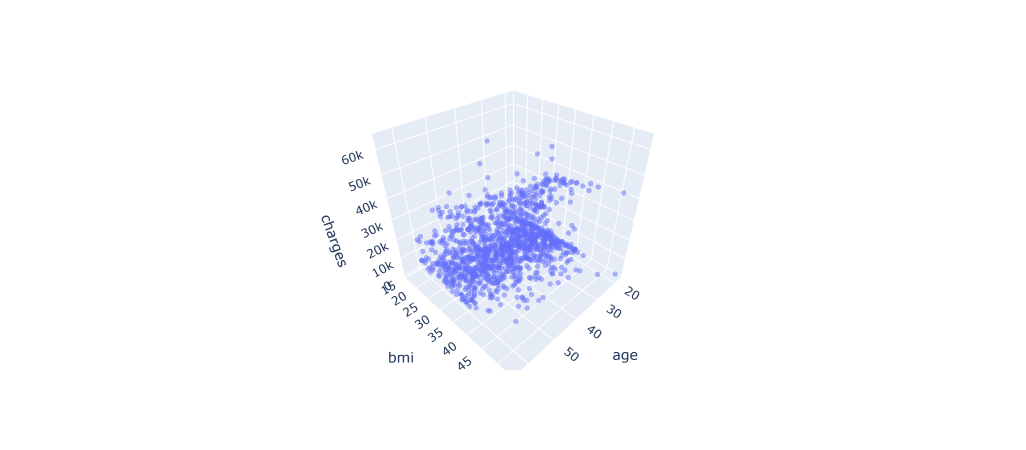

In [57]:
fig = px.scatter_3d(medical_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

You can see that it's harder to interpret a 3D scatter plot compared to a 2D scatter plot. As we add more features, it becomes impossible to visualize all feature at once, which is why we use measures like correlation and loss. 

Let's also check the parameters of the model.

In [58]:
model.coef_, model.intercept_

(array([241.9307779 , 332.96509081]), -6424.804612240769)

One thing important thing to keep in mind: ***you can't find a relationship that doesn't exist, no matter what machine learning technique or optimization algorithm you apply***. 

Let's go one step further, and add the final numeric column: "children", which seems to have some correlation with "charges".

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + b$

In [59]:
medical_df.charges.corr(medical_df.children)

0.06799822684790478

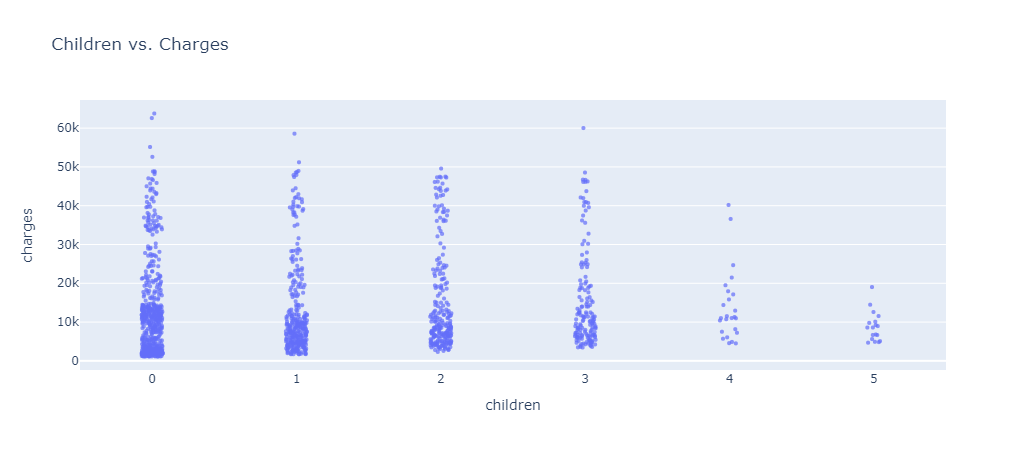

In [60]:
fig = px.strip(medical_df, x='children', y='charges', title= "Children vs. Charges")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

In [61]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11355.317901125973


Once again, we don't see a big reduction in the loss, even though it's greater than in the case of BMI.

## Using Categorical Features for Machine Learning

So far we've been using only numeric columns, since we can only perform computations with numbers. If we could use categorical columns like "smoker", we can train a single model for the entire dataset.

To use the categorical columns, we simply need to convert them to numbers. There are three common techniques for doing this:

1. If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and 1.
2. If a categorical column has more than 2 categories, we can perform one-hot encoding i.e. create a new column for each category with 1s and 0s.
3. If the categories have a natural order (e.g. cold, neutral, warm, hot), then they can be converted to numbers (e.g. 1, 2, 3, 4) preserving the order. These are called ordinals




## Binary Categories
we have $3$ categorical columns in the dataset. let's try to address them one by one.

#### Column 1

The "smoker" category has just two values "yes" and "no". Let's create a new column "smoker_code" containing 0 for "no" and 1 for "yes".


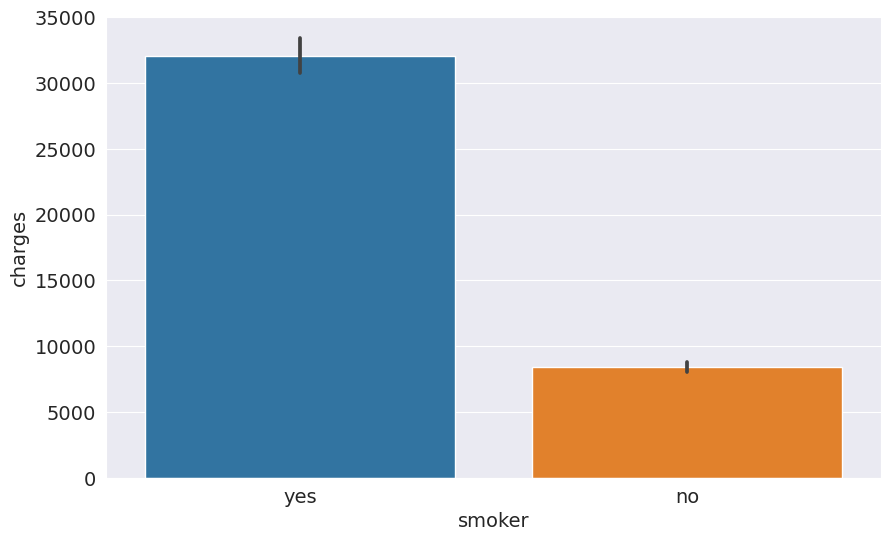

In [62]:
sns.barplot(data=medical_df, x='smoker', y='charges');

In [66]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes) #creating a new column `smoker_code` ,
                                                                        # instead of overwriting `smoker` column

In [64]:
medical_df.charges.corr(medical_df.smoker_code)

0.787251430498478

In [67]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


We can now use the `smoker_df` column for linear regression.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + b$

In [68]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188081


The loss reduces from `11355` to `6056`, almost by 50%! This is an important lesson: never ignore categorical data.

#### Column 2

Let's try adding the "sex" column as well.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + b$

<AxesSubplot:xlabel='sex', ylabel='charges'>

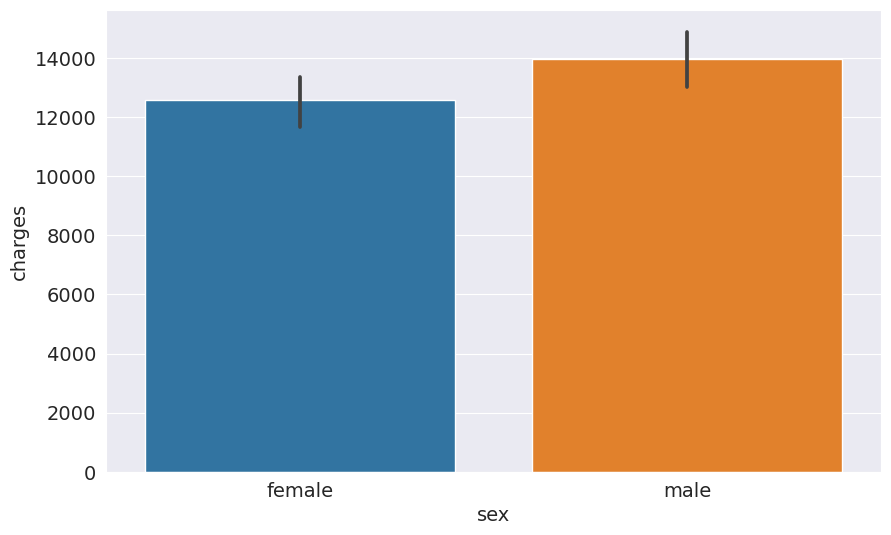

In [69]:
sns.barplot(data=medical_df, x='sex', y='charges')

In [70]:
sex_codes = {'female': 0, 'male': 1}

medical_df['sex_code'] = medical_df.sex.map(sex_codes) #maping numbers inplace as we did in `smoker` column

In [71]:
medical_df.charges.corr(medical_df.sex_code) #still weak coorelation

0.057292062202025484

In [72]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.100708754546


As you might expect, this does have a significant impact on the loss.

### One-hot Encoding

#### Column 3

The "region" column contains 4 values, so we'll need to use hot encoding and create a new column for each region.

![](https://i.imgur.com/n8GuiOO.png)


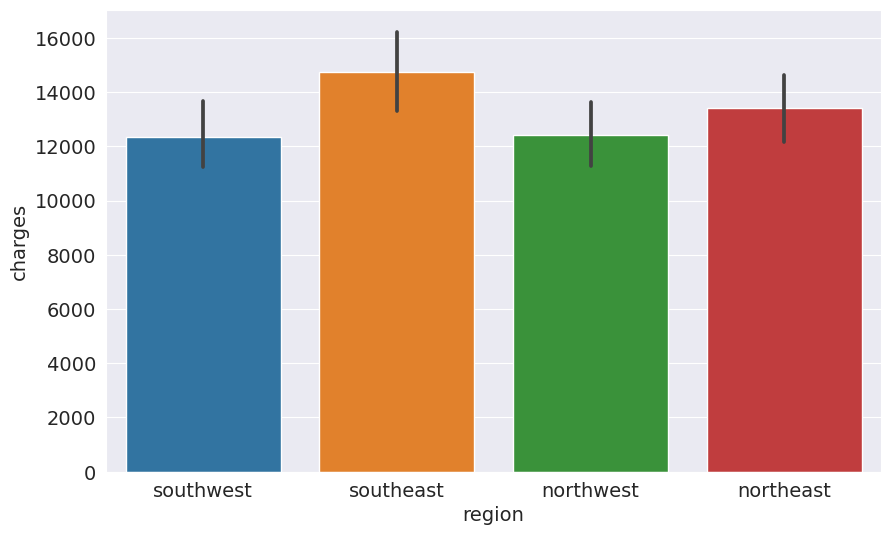

In [73]:
sns.barplot(data=medical_df, x='region', y='charges');

`ONEHOTENCODING` can be done in $2$ ways one using `OneHotEncoder` from *sklearn* or using `get_dummies` from *pandas*. Both will yeild similar results but the only differene is than the $OneHotEncoder$ will not overide the origonal dataset instead it will give array as output which we can then merge. While, $get_dummies$ directly merges the result onto the original datset when used. **I used $OneHotEncoder$ for this tutorial as we are doing *ONEHOTENCODING* first then *Scaling* more on this i'll explain it below.**

In [74]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [75]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [77]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


Let's include the region columns into our linear regression model.

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

In [78]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']
# Since we have the original columns as well the encoded columns i'll select the encoded columns alone

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


## Model Improvements

Let's discuss and apply some more improvements to our model.

### Feature Scaling

Recall that due to regulatory requirements, we also need to explain the rationale behind the predictions our model. 

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

To compare the importance of each feature in the model, our first instinct might be to compare their weights. 

In [91]:
# w
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [92]:
# b
model.intercept_

-12525.547811195444

In [79]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


While it seems like BMI and the "northeast" have a higher weight than age, keep in mind that the range of values for BMI is limited (15 to 40) and the "northeast" column only takes the values 0 and 1.

Because different columns have different ranges, we run into two issues:

1. We can't compare the weights of different column to identify which features are important
2. A column with a larger range of inputs may disproportionately affect the loss and dominate the optimization process.

For this reason, it's common practice to scale (or standardize) the values in numeric column by subtracting the mean and dividing by the standard deviation.

![](https://i.imgur.com/dT5fLFI.png)

Feature scaling is performed on datasets to normalize or standardize the numerical features, bringing them to a similar scale or range. This is done to ensure that all features contribute equally to the model's predictions and to prevent any unintended bias or dominance of certain features due to differences in scale.

Performing scaling on datasets can have several benefits:

* Prevents numerical features with different magnitudes or units of measurement from dominating or biasing the model's predictions. Scaling brings features to a similar scale, which helps in fair and balanced contribution of all features to the model's decision-making process.

* Enhances the convergence and performance of machine learning algorithms that are sensitive to the scale of input features. Algorithms such as gradient descent or SVM can converge faster and perform better with scaled features, as differences in scale can impact their optimization or decision boundary.

* Improves the interpretability of model results. Scaling makes it easier to compare the relative importance or contribution of different features to the model's predictions, as they are on a similar scale.

Common scaling techniques include min-max scaling (also known as normalization), where features are scaled to a specific range (e.g., [0, 1]), and z-score scaling (also known as standardization), where features are scaled to have zero mean and unit variance. Scaling is typically performed after splitting the data into training and testing sets to prevent data leakage and ensure that the scaling is done independently for each set.

In summary, performing scaling on datasets means normalizing or standardizing the numerical features to a similar scale or range, which can prevent bias, enhance model performance, and improve interpretability of results.

We can apply scaling using the StandardScaler class from `scikit-learn`.

In [81]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [83]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['age', 'bmi', 'children'] #Scaling can be done only on numerical columns
scaler = StandardScaler()                 #This should not include converted catrgorical columns. More on this below.
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [84]:
scaler.mean_ #this is the mean predicted for these columns induvidually

array([39.20702541, 30.66339686,  1.09491779])

In [85]:
scaler.var_  #this is the variance predicted for these columns induvidually

array([197.25385199,  37.16008997,   1.45212664])

We can now scale data as follows:

In [86]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

since the scaler only gives output in arrays we have to merge them back to the original columns. But i'm taking the categorical columns from the original dataset then using them directly in the linear regression model. J**ust try to understand how scaling works i'll attached a complied code of how to implement linear regression code in python at the end**. Let's continue, after scaling these can now we combined with the categorical data

In [87]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [88]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.679651174452


We can now compare the weights in the formula:

$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

In [89]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


As you can see now, The weights are distributed accoding to the importance of the features correctlyt. the most important feature are:

1. Smoker
2. Age
3. BMI


## (SCALING AFTER ENCODING) vs (ENCODING AFTER SCALING)

In general, it is recommended to perform feature scaling before encoding categorical variables in a dataset that contains both categorical and numerical columns. The reason is that most feature scaling techniques operate on numerical values and are intended to bring numerical features to a similar scale or range, which can improve the performance of machine learning algorithms.

Here are some reasons why it is usually better to perform feature scaling before encoding categorical variables:

* Scaling numerical features can help in mitigating the impact of differences in magnitude or units of measurement among numerical features. Many machine learning algorithms are sensitive to the scale of input features, and features with larger magnitudes may dominate or bias the model's predictions. Scaling numerical features can bring them to a similar scale, helping to prevent this issue.

* Feature scaling can also help in improving the convergence and performance of certain machine learning algorithms that are based on distance or similarity measures, such as k-nearest neighbors or support vector machines. These algorithms can be affected by differences in scale among numerical features, and scaling can help in making the algorithm more robust and accurate.

* Categorical variables, on the other hand, do not typically require scaling because they are represented as discrete values or labels, and their values do not have a magnitude or units of measurement that can be scaled. Encoding categorical variables, such as one-hot encoding or label encoding, is usually done to convert them into numerical representations that can be understood by machine learning algorithms.

By performing feature scaling before encoding categorical variables, you ensure that the numerical features in your dataset are on a similar scale and can be effectively processed by machine learning algorithms. Additionally, it helps to prevent any unintended bias or dominance of certain features due to differences in scale. Once the numerical features are scaled, you can then proceed with encoding the categorical variables to prepare the data for further analysis or modeling.

**Thus it is always best practise to first scale numerical values then encoding.**

### Creating a Test Set

Models like the one we've created in this tutorial are designed to be used in the real world. It's common practice to set aside a small fraction of the data (e.g. 10%) just for testing and reporting the results of the model. ***This is a very basic demo of test train split, there is more common and straight forward way which i will be explaining the below with a fresh linear regression example.***

In [90]:
from sklearn.model_selection import train_test_split

inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

#here the inputs is nothing but the numerical columns + categorical columns

In [91]:
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 6655.800586345401


Let's compare this with the training loss.

In [92]:
# Generate predictions
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 5972.903240456695


We can see that the training loss is lower than the test loss. Actually it should be the opposite right, This is called `Underfitting` meaning that the model is poorly trined over the training dataset. There is also `Overfitting` which is exactly opposite to *Underfitting*

Overfitting refers to a phenomenon in machine learning where a model learns to perform well on the training data but does not generalize well to unseen data. In other words, an overfit model may show very high accuracy or performance on the training data, but may perform poorly on new, unseen data.

The main reason behind overfitting is when a model becomes too complex and captures noise or irrelevant patterns in the training data, rather than the underlying true patterns. This results in the model fitting the training data too closely and not being able to generalize well to new data.

There are several signs or symptoms of overfitting, which include:

* High training accuracy, but low validation or test accuracy: The model performs well on the training data but poorly on new, unseen data.

* Large differences between training and validation/test performance: There is a significant gap between the performance of the model on the training data compared to the validation or test data.

* High model complexity: The model has too many parameters or features relative to the amount of training data available, leading to overfitting.

* Model predictions that are overly confident: The model may produce highly confident predictions on training data, but may be less confident and more uncertain on new, unseen data.

To mitigate overfitting, various techniques can be employed, such as reducing the complexity of the model (e.g., using fewer features or reducing the number of model parameters), increasing the amount of training data, using regularization techniques (e.g., L1 or L2 regularization), and using techniques like cross-validation to assess model performance on multiple subsets of data. The goal is to strike a balance between model complexity and generalization ability to ensure that the model performs well not only on the training data but also on unseen data.

### Improving The Model's Accuracy (Advanced Techniques)

#### `MULTICOLINEARITY`
A Model's Performace can be improved in many ways by carefully seleccting the features involved, Scaling, modifying certain features etc. At some point even if one feature seem to have a poor coorelation with the targets variable, removing it severely affects the model's perfomance. You may wonder why, This is because of the concept called `Multicolinearity`.

*Multicollinearity refers to a statistical phenomenon that occurs when two or more independent variables in a regression model are highly correlated with each other. In other words, it means that there is a strong linear relationship between two or more predictor variables in the model.*

*Multicollinearity can cause issues in statistical analysis because it can make it difficult to determine the individual effect of each predictor variable on the dependent variable. When predictor variables are highly correlated, it can lead to unstable or unreliable estimates of their coefficients, making it challenging to interpret the true impact of each variable on the outcome. Multicollinearity can also affect the reliability of statistical inferences, such as hypothesis testing and confidence interval estimation.*

*A simple analogy for multicollinearity is imagining a scenario where you have two friends who always go to the movies together. If you try to analyze their movie preferences separately, it may be difficult to determine their individual preferences because they always choose the same movies. Similarly, in a regression model, when two or more predictor variables are highly correlated, it becomes challenging to isolate their individual effects on the outcome variable, and this is known as multicollinearity.*

Here are some common approaches to tackle multicollinearity:

*Feature Selection: You can identify and remove redundant or highly correlated features from your dataset. This can be done through various techniques such as correlation analysis, variance inflation factor (VIF), and recursive feature elimination (RFE) to select a subset of important features for your model.

*Regularization Techniques: Regularization techniques such as Ridge and Lasso regression can be used to mitigate multicollinearity by adding a penalty term to the regression objective function. Ridge regression introduces a penalty term that shrinks the coefficients of correlated predictors towards zero, while Lasso regression can completely eliminate less important predictors by setting their coefficients to zero.

*Principal Component Analysis (PCA): PCA is a dimensionality reduction technique that can be used to transform correlated predictors into a set of uncorrelated variables (principal components). These principal components can then be used as input variables in your regression model, reducing the impact of multicollinearity.

*Data Collection: If possible, collecting more data can help mitigate multicollinearity by providing a larger sample size and reducing the impact of small sample correlations.

It's important to note that the choice of approach to tackle multicollinearity depends on the specific characteristics of your data and the problem you are trying to solve. It's recommended to evaluate the performance of different techniques on your specific dataset and choose the one that works best for your model.

[READ MORE ABOUT MULTICOLINEARITY HERE](https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/)

#### `POLYNOMIAL FEATURES`
Applying polynomial features to a linear regression model involves creating additional features or predictor variables by taking higher order powers of the existing input features. In simpler terms, it means transforming the input features into higher-degree polynomial terms to capture non-linear relationships in the data.

For example, consider a simple linear regression problem with one input feature x and one target variable y. The linear regression model tries to fit a straight line (i.e., a first-degree polynomial) to the data. However, if the relationship between x and y is not linear, a straight line may not fit the data well.

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*yim5OMiku3dNMXEv3GiItg.png)

To capture non-linear relationships, we can apply polynomial features to the input feature x by creating new features with higher powers of x, such as x^2, x^3, and so on. These higher-degree polynomial features can help the linear regression model capture non-linear patterns in the data.

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*uJtlIlaT-o3DDh5VaGsy4A.png)

Applying polynomial features to a linear regression model can help capture non-linear patterns in the data and potentially improve the model's performance. However, it's important to carefully evaluate the performance of the model with different degrees of polynomial features and avoid overfitting, as higher degrees of polynomial features can lead to increased model complexity and potential overfitting.

[READ MORE ABOUT POLYNOMIAL FEATURES HERE](https://data36.com/polynomial-regression-python-scikit-learn/)

#### `GRADIENT DESCENT`
Gradient descent is an iterative optimization algorithm used to minimize the cost or loss function in machine learning models, including multiple linear regression. The intuition behind gradient descent in the context of multiple linear regression is to find the best-fit parameters (coefficients) for the multiple regression equation that minimizes the difference between the predicted values and the actual target values.

In multiple linear regression, the goal is to find the values of the coefficients (also known as weights or parameters) for each input feature that minimizes the overall prediction error. The prediction error is typically quantified using a cost or loss function, such as Mean Squared Error (MSE) or Root Mean Squared Error (RMSE).

Gradient descent starts with an initial guess for the parameter values and iteratively updates them to move towards the optimal values that minimize the cost function. At each iteration, the algorithm calculates the gradient (derivative) of the cost function with respect to each parameter, and updates the parameter values by taking a step in the opposite direction of the gradient, multiplied by a learning rate. The learning rate determines the size of the step taken in each iteration and can be tuned to control the convergence speed of the algorithm.

![](https://static.javatpoint.com/tutorial/machine-learning/images/gradient-descent-in-machine-learning1.png)

The process is repeated until the algorithm converges to a minimum point of the cost function, which corresponds to the optimal parameter values that result in the best-fit model. Gradient descent allows the algorithm to "descend" or move down the gradient of the cost function, iteratively updating the parameters to minimize the prediction error and improve the model's accuracy.

The intuition of gradient descent in multiple linear regression is to iteratively adjust the parameter values to find the best-fit coefficients that minimize the prediction error and result in an accurate and optimal regression model.

[READ MORE ABOUT GRADIENT DESCENT HERE](https://www.analyticsvidhya.com/blog/2020/10/how-does-the-gradient-descent-algorithm-work-in-machine-learning/)

### How to Approach a Machine Learning Problem

Here's a strategy you can apply to approach any machine learning problem:

1. Explore the data and find correlations between inputs and targets
2. Pick the right model, loss functions and optimizer for the problem at hand
3. Scale numeric variables and one-hot encode categorical data
4. Set aside a test set (using a fraction of the training set)
5. Train the model
6. Make predictions on the test set and compute the loss

We'll apply this process to several problems in future tutorials.

## Summary and Further Reading

We've covered the following topics in this tutorial:

- A typical problem statement for machine learning
- Downloading and exploring a dataset for machine learning
- Linear regression with one variable using Scikit-learn
- Linear regression with multiple variables 
- Using categorical features for machine learning
- Regression coefficients and feature importance
- Creating a training and test set for reporting results

Apply the techniques covered in this tutorial to the following datasets:

- https://www.kaggle.com/vikrishnan/boston-house-prices
- https://www.kaggle.com/sohier/calcofi
- https://www.kaggle.com/budincsevity/szeged-weather 


Check out the following links to learn more about linear regression:

- https://jovian.ai/aakashns/02-linear-regression
- https://www.kaggle.com/hely333/eda-regression
- https://www.youtube.com/watch?v=kHwlB_j7Hkc



Guess this is too much info for a begineer trying to learn machine learning. It's ok even i was like this *still 
i'm* But i want this notebook to a single point refference to Linear Regression.

## Revision Questions
1.	Why do we have to perform EDA before fitting a model to the data?
2.	What is a parameter?
3.	What is correlation?
4.	What does negative correlation mean?
5.	How can you find correlation between variables in Python?
6.	What is causation? Explain difference between correlation and causation with an example.
7.	Define Linear Regression.
8.	What is univariate linear regression?
9.	What is multivariate linear regression?
10.	What are weights and bias?
11.	What are inputs and targets?
12.	What is loss/cost function?
13.	What is residual? 
14.	What is RMSE value? When and why do we use it?
15.	What is an Optimizer? What are different types of optimizers? Explain each with an example.
16.	What library is available in Python to perform Linear Regression?
17.	What is <code>sklearn.linear_model </code>?
18.	What does <code>model.fit()</code> do? What arguments must be given?
19.	What does <code>model.predict()</code> do? What arguments must be given?
20.	How do we calculate RMSE values?
21.	What is <code>model.coef_</code>?
22.	What is <code>model.intercept_</code>?
23.	What is SGDRegressor? How is it different from Linear Regression?
24.	Define Machine Learning. What are the main components in Machine Learning?
25.	How does loss value help in determining whether the model is good or not?
26.	What are continuous and categorical variables?
27.	How do we handle categorical variables in Machine Learning? What are the common techniques?
28.	What is feature scaling? How does it help in Machine Learning?
29.	How do we perform scaling in Python?
30.	What is <code>sklearn.preprocessing</code>?
31.	What is a Test set?
32.	How do we split data for model fitting (training and testing) in Python?
33.	How do you approach a Machine Learning problem?

# THE END

***That's it for now this is as vast as i've learnt as my first Machine leraning model. I first thought this is just matter of few lines of code but then wanted to know the explanation behind it, when i strated to explore it kept on going wider and wider. I created this notebook as my referrence point for `Linear Regression` as well for others who are starting out and yes Machine learning involves maths and statistics. Python here serves as a platform to execute all the math to these problems. I'll update this notebook as i find any new things about Linear Regression also will try to create similar notebooks for other Machine Learning models as well. Thanks for jovian which gave a headstart for me into Deeper Machine Learning Understanding.***